### Figures, Axes, and Subplots

The base of visualization in matplotlib is a [Figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html) object. Contained within each Figure will be one or more [Axes](https://matplotlib.org/api/axes_api.html) objects, each Axes object containing a number of other elements that represent each plot.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Import dataset
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


&nbsp;

#### Example 1. Demonstrate figure `.add_axes(`) and `axes.hist()`

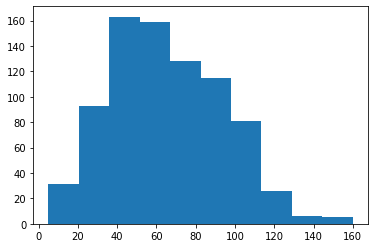

In [2]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

#### Example 2. Use axes with `seaborn.countplot()`

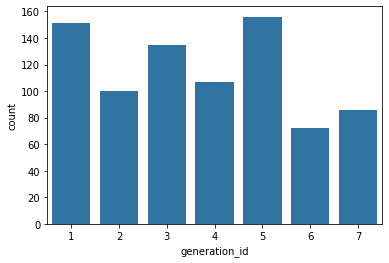

In [3]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, 
             x = 'generation_id', 
             color = base_color,
             ax = ax);

#### Example 3. Sub-plots

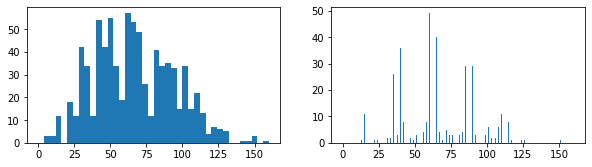

In [4]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [10, 2.5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

#### Example 4. Demonstrate `pyplot.sca()` and `pyplot.text()` to generate a grid of subplots

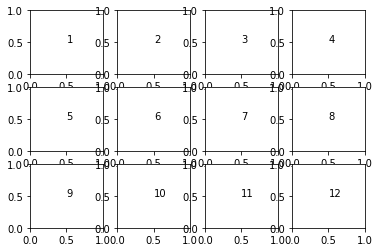

In [5]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes